Group 10: PERFECT TEN Presents The Effects of Facility Air Pollution and Income on Life Expectancy
Data Sources: EPA, Golden Oaks Research Group, and Global Health Data Exchange
Wisconsin: The decision to look into wisconsin is supported in the facility_df notebook

In [148]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import zipfile
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [149]:
#Wisconsin Facility Data Frame
df = pd.read_csv('Facility Air Pollution Dataset - All Facilities.csv', low_memory = False)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df_clean = df.loc[df['Rank_TRI_14'].notnull()].sort_values(by = 'Rank_TRI_14')
df_clean['Rank_TRI_14'] = list(range(15461,0, -1))
df_wi = df_clean.loc[df['State'] == 'WI']
df_wi

,Unique ID,FacilityName,Rank_TRI_14,Rank_GHG_14,Latitude,Longitude,LocationAddress,City,State,ZIP,County,FIPScode,PrimaryNAICS,SecondPrimaryNAICS,ThirdPrimaryNAICS,IndustryType,Parent_Companies_2014_GHG,Parent_Companies_2014_TRI,TRI_Air_Emissions_14_in_lbs,TRI_Air_Emissions_13_in_lbs,TRI_Air_Emissions_12_in_lbs,TRI_Air_Emissions_11_in_lbs,TRI_Air_Emissions_10_in_lbs,GHG_Direct_Emissions_14_in_metric_tons,GHG_Direct_Emissions_13_in_metric_tons,GHG_Direct_Emissions_12_in_metric_tons,GHG_Direct_Emissions_11_in_metric_tons,GHG_Direct_Emissions_10_in_metric_tons,GHG_ID,Second_GHG_ID,Third_GHG_ID,Fourth_GHG_ID,Fifth_GHG_ID,Sixth_GHG_ID,TRI_ID,Second_TRI_ID,Third_TRI_ID,Fourth_TRI_ID,Fifth_TRI_ID,FRS_ID,Second_FRS_ID,Third_FRS_ID,Fourth_FRS_ID
25921,110017413547,WISCONSIN RAPIDS PULP MILL,15366,1126.0,44.404000,-89.825500,950 4TH AVE N,WISCONSIN RAPIDS,WI,54495,WOOD,55141.0,322110,322121.0,NaN,"Pulp and Paper,Suppliers of CO2,Waste",NEW PAGE HOLDING CORP (100%);,VERSO PAPER CORP,1396152,1693201,1693201,1642222,1526981,387932,347829,395689,433395,372112,1006095.0,NaN,NaN,NaN,NaN,NaN,54494CNSLD950FO,NaN,NaN,NaN,NaN,110017413547,NaN,NaN,NaN
25556,110000420973,THILMANY PAPER MILL,15311,1232.0,44.282900,-88.251800,600 THILMANY RD,KAUKAUNA,WI,54130,OUTAGAMIE,55087.0,322121,NaN,NaN,"Pulp and Paper,Waste",EXPERA SPECIALTY SOLUTIONS (100%);,EXPERA SPECIALTY SOLUTIONS,1033668,1093399,927770,1015236,1029652,339897,355813,324613,363798,385954,1002339.0,NaN,NaN,NaN,NaN,NaN,54130THLMNTHILM,NaN,NaN,NaN,NaN,110000420973,NaN,NaN,NaN
25022,110013863275,GEORGIA-PACIFIC CONSUMER PRODUCTS LP,15261,694.0,44.492500,-88.032300,1919 S BROADWAY,GREEN BAY,WI,54304,BROWN,55009.0,322121,NaN,NaN,Pulp and Paper,KOCH INDUSTRIES INC (100%);,KOCH INDUSTRIES INC,788166,817313,749250,873422,903299,865247,958148,1003065,1021491,1048021,1000589.0,NaN,NaN,NaN,NaN,NaN,54307FRTHW1919S,NaN,NaN,NaN,NaN,110013863275,NaN,NaN,NaN
25922,110000573692,BIRON MILL,15178,1124.0,44.428900,-89.781700,621 BIRON DR,WISCONSIN RAPIDS,WI,54494,WOOD,55141.0,322121,NaN,NaN,"Pulp and Paper,Waste",NewPage Holding Corporation (100%);,NEWPAGE CORP,566222,527344,438560,400731,414821,387960,349520,481035,472469,518207,1003327.0,NaN,NaN,NaN,NaN,NaN,54494CNSLD621BI,NaN,NaN,NaN,NaN,110000573692,NaN,NaN,NaN
25923,110000544233,WATER QUALITY CENTER,15101,3654.0,44.423280,-89.831663,2811 5TH AVE N,WISCONSIN RAPIDS,WI,54495,WOOD,55141.0,322121,NaN,NaN,"Pulp and Paper,Waste",NEW PAGE HOLDING CORP (100%);,VERSO PAPER CORP,456280,456180,456080,164290,163507,57055,55491,65597,65828,176,1007400.0,NaN,NaN,NaN,NaN,NaN,54494CNSLDNASHR,NaN,NaN,NaN,NaN,110000544233,NaN,NaN,NaN
25337,110000422267,PACKAGING CORPORATION OF AMERICA-TOMAHAWK,15080,1362.0,45.450849,-89.740303,N9090 COUNTY RD E,TOMAHAWK,WI,54487,LINCOLN,55069.0,322130,NaN,NaN,"Pulp and Paper,Waste",Packaging Corporation of America (100%);,PACKAGING CORP OF AMERICA,430296,437543,398738,420264,409399,271031,269590,265181,263655,256884,1003884.0,NaN,NaN,NaN,NaN,NaN,54487NKSPCN9090,NaN,NaN,NaN,NaN,110000422267,NaN,NaN,NaN
25416,110000417709,Oak Creek Generating Station complex -- Elm Ro...,15054,32.0,42.845717,-87.829479,11060 S CHICAGO RD,OAK CREEK,WI,53154,MILWAUKEE,55079.0,221112,NaN,NaN,Power Plants,WISCONSIN ENERGY CORP; WPPI ENERGY; Madison Ga...,WISCONSIN ENERGY CORP,405015,295343,325937,402204,222453,11276585,8464953,6475997,10485899,7559884,1000982.0,1000491.0,NaN,NaN,NaN,NaN,53154KCRKP4801E,NaN,NaN,NaN,NaN,110000417709,1.100641e+11,NaN,NaN
25924,110040877619,DOMTAR NEKOOSA PAPER MILL,14978,1161.0,44.314300,-89.896200,301 POINT BASSE AVE,NEKOOSA,WI,54457,WOOD,55141.0,322121,NaN,NaN,"Pulp and Paper,Waste",Domtar Corporation (100%);,DOMTAR CORP,324757,370638,359056,338530,332201,371653,395037,398082,401939,329154,1004396.0,NaN,NaN,NaN,NaN,NaN,54457NKSMLMARKE,NaN,NaN,NaN,NaN,110040877619,NaN,NaN,NaN
25166,110000416425,QUAD/GRAPHICS INC,14936,4631.0,43.626400,-88.444600,952 BADGER ROAD,LOMIRA,WI,53048,DODGE,55027.0,323111,NaN,NaN,Pulp and Paper,"QUAD/GRAPH

In [150]:
# ranking and setting up for weighted ranks
ranking_wi = df_wi.groupby('County').sum()
count_wi = df_wi.groupby('County').count()

weight_rank = []

for i in range(0,len(count_wi)):
    item1 = ranking_wi.iloc[i,0]
    item2 = count_wi.iloc[i,2]
    weight_rank.append(item1*item2/1000)

data = {'County': count_wi.index, 'Weighted Rank': weight_rank} 

In [151]:
# .sort_values(by = 'Weighted Rank', ascending= False)
wi_rank_df = pd.DataFrame(data)
wi_rank_df.head(5)

,County,Weighted Rank
0,ADAMS,9.932
1,ASHLAND,31.988
2,BARRON,702.189
3,BROWN,8785.226
4,BUFFALO,14.545


In [152]:
#getting county sizes to review pollution per mile 
counties_size = pd.read_csv('WI counties size.csv')
for i in range(len(counties_size['Value'])):
    counties_size['Value'][i] = counties_size['Value'][i].replace(',','')

#counties_size['Value']

In [153]:
pd.to_numeric(counties_size['Value'])
counties_size['County'] = counties_size['County'].str.upper()
wi_df = counties_size.merge(right = wi_rank_df, left_on= 'County', right_on='County', how='outer')
wi_df['Weighted Rank'].fillna(0, inplace = True)
wi_df['Final Ranking'] = wi_df['Weighted Rank']*100/pd.to_numeric(wi_df['Value'])
wi_df.sort_values(by = 'Weighted Rank', ascending= False)

,County,Value,Weighted Rank,Final Ranking
40,MILWAUKEE,241.4,45447.302,18826.554267
67,WAUKESHA,549.57,18118.974,3296.936514
4,BROWN,529.71,8785.226,1658.497291
12,DANE,1197.24,6366.312,531.749023
70,WINNEBAGO,434.49,3752.473,863.650026
36,MARATHON,1544.98,3624.060,234.570027
58,SHEBOYGAN,511.27,3023.166,591.305181
44,OUTAGAMIE,637.52,2865.030,449.402372
35,MANITOWOC,589.08,2409.780,409.075168
71,WOOD,793.12,1815.476,228.903066


In [154]:
wi_df.sort_values(by = 'Final Ranking', ascending= False)

,County,Value,Weighted Rank,Final Ranking
40,MILWAUKEE,241.4,45447.302,18826.554267
67,WAUKESHA,549.57,18118.974,3296.936514
4,BROWN,529.71,8785.226,1658.497291
70,WINNEBAGO,434.49,3752.473,863.650026
58,SHEBOYGAN,511.27,3023.166,591.305181
12,DANE,1197.24,6366.312,531.749023
45,OZAUKEE,233.08,1099.742,471.830273
44,OUTAGAMIE,637.52,2865.030,449.402372
35,MANITOWOC,589.08,2409.780,409.075168
29,KENOSHA,271.99,987.107,362.920328


In [155]:
#Health Data Frame
# Read Life Expectancy File and store into Pandas data frame
healthdf = pd.read_csv("Health.csv")
healthdf.tail() #using tail becuase state summary is at the top of the file

,measure_id,measure_name,location_id,location_name,FIPS,sex_id,sex,age_id,age_name,year_id,metric,val,upper,lower
45985,34,Mortality risk,3638,Wood County,55141,3,Both,168,65 to 85,2010,Percentage,46.795614,48.245195,45.454433
45986,34,Mortality risk,3638,Wood County,55141,3,Both,168,65 to 85,2011,Percentage,46.442541,47.773633,45.163666
45987,34,Mortality risk,3638,Wood County,55141,3,Both,168,65 to 85,2012,Percentage,46.359673,47.703183,45.076532
45988,34,Mortality risk,3638,Wood County,55141,3,Both,168,65 to 85,2013,Percentage,46.027348,47.469959,44.661011
45989,34,Mortality risk,3638,Wood County,55141,3,Both,168,65 to 85,2014,Percentage,45.525599,46.895409,44.172333


In [156]:
#drops years that are not 2014
healthdf.drop(healthdf.index[healthdf['year_id'] != 2014], inplace = True)
#drop mortality risk
healthdf.drop(healthdf.index[healthdf['measure_name'] != 'Life expectancy'], inplace = True)

#formatting
healthdf['location_name'] = healthdf['location_name'].str.upper()
healthdf['location_name'] = healthdf['location_name'].str.replace('COUNTY','')

#Pivot Table of Data Frame
healthpivot = pd.pivot_table(healthdf,index=['FIPS','location_name','sex'],
                                       values=['val'],
                                       aggfunc={'val':np.mean})
#show lowest life
healthpivot = healthpivot.nsmallest(5,'val')

healthpivot

val
FIPS  location_name sex            
55078 MENOMINEE     Male  69.800259
                    Both  72.814850
55135 WAUPACA       Male  75.007037
55079 MILWAUKEE     Male  75.048078
55003 ASHLAND       Male  75.221359

In [157]:
#seperate data frames
healthboth_df = healthdf.loc[healthdf['sex'] == 'Both']
healthma_df = healthdf.loc[healthdf['sex'] == 'Male']
healthfe_df = healthdf.loc[healthdf['sex'] == 'Female']
healthfe_df

,measure_id,measure_name,location_id,location_name,FIPS,sex_id,sex,age_id,age_name,year_id,metric,val,upper,lower
69,26,Life expectancy,572,WISCONSIN,55,2,Female,161,0,2014,Years,81.898503,81.982344,81.810366
174,26,Life expectancy,3670,ADAMS,55001,2,Female,161,0,2014,Years,81.036637,81.817024,80.282969
279,26,Life expectancy,3622,ASHLAND,55003,2,Female,161,0,2014,Years,80.386521,81.215060,79.524497
384,26,Life expectancy,3629,BARRON,55005,2,Female,161,0,2014,Years,81.817434,82.401250,81.228511
489,26,Life expectancy,3620,BAYFIELD,55007,2,Female,161,0,2014,Years,81.991371,82.796236,81.171766
594,26,Life expectancy,3667,BROWN,55009,2,Female,161,0,2014,Years,82.474285,82.867707,82.076752
699,26,Life expectancy,3640,BUFFALO,55011,2,Female,161,0,2014,Years,82.480065,83.303624,81.636092
804,26,Life expectancy,3626,BURNETT,55013,2,Female,161,0,2014,Years,81.799585,82.601705,81.028039
909,26,Life expectancy,3673,CALUMET,55015,2,Female,161,0,2014,Years,82.463513,83.085283,81.851287
1014,26,Life expectancy,3632,CHIPPEWA,55017,2,Female,161,0,2014,Years,82.226321,82.761859,81.654167


In [158]:
#Income Data Frame
#Read Income File and store into Pandas data frame
incomedf = pd.read_csv("Income.csv",encoding="ISO-8859-1")
incomedf.head(5)

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


In [159]:
incomedf['County'] = incomedf['County'].str.upper()
incomedf['County'] = incomedf['County'].str.replace('COUNTY','')
#drops states that are not Wisconsin 
incomedf.drop(incomedf.index[incomedf['State_ab'] != 'WI'], inplace = True)
incomedf.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
31397,55011007,55,Wisconsin,WI,SHAWANO,Marion,Caroline,CDP,place,54950,715,3072038,207052,44.723328,-88.899566,61462,300000,32656,46.131494
31398,55011017,55,Wisconsin,WI,OZAUKEE,Cedarburg,Cedarburg city,City,place,53012,262,12536664,132011,43.298547,-87.989107,90405,72980,70093,2227.975295
31399,55011027,55,Wisconsin,WI,CALUMET,Chilton,Chilton city,City,place,53014,920,10984922,120045,44.028082,-88.163723,58191,49115,44167,1020.365344
31400,55011037,55,Wisconsin,WI,BUFFALO,Fountain City,Cochrane,Village,place,54629,608,2024909,54183,44.227066,-91.841054,45553,46123,31857,132.893677
31401,55011047,55,Wisconsin,WI,WALWORTH,Lake Geneva,Como,CDP,place,53147,262,9300193,1527677,42.614250,-88.505124,76360,58764,63061,507.073139


In [160]:
#Pivot Table of Data Frame
incomepivot = pd.pivot_table(incomedf,index=['County'],
                                       values=['Mean'],
                                       aggfunc={'Mean':np.mean})
incomepivot

,Mean
County,
ADAMS,64616.106780
BAYFIELD,41559.000000
BROWN,71829.000000
BUFFALO,45669.000000
CALUMET,72069.666667
CHIPPEWA,41351.000000
COLUMBIA,59530.000000
CRAWFORD,48611.000000
DANE,101770.000000


The Following Section Includes the Graphs for the presentation

219
73


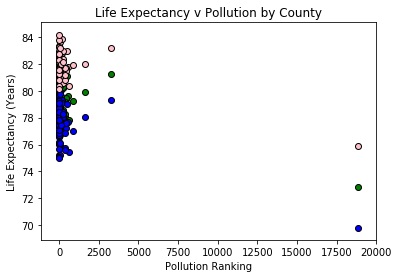

In [161]:
#2) Scatter plot: Life expectancy vs County names (ordered by the final ranking)

# Create a title, x label, and y label for our chart
plt.title("Life Expectancy v Pollution by County")
plt.ylabel("Life Expectancy (Years)")
plt.xlabel("Pollution Ranking")


y_axis = healthboth_df['val']
y_axis2 = healthma_df['val']
y_axis3 = healthfe_df['val']
x_axis = wi_df['Final Ranking']

plt.scatter(x_axis, y_axis, marker="o", facecolors="green", edgecolors="black")
plt.scatter(x_axis, y_axis2, marker="o", facecolors="blue", edgecolors="black")
plt.scatter(x_axis, y_axis3, marker="o", facecolors="pink", edgecolors="black")

print(len(healthdf['val']))
print(len(wi_df['Final Ranking']))
plt.savefig("Images/LifevPollution_withOutlier.png")


Show what is the outlier in the graph above then drop and see what that does to the data
The county is Menominee

Another possible graph could be comparison male to female in certain counties

Also income by life expectancy

In [162]:
healthpivot

val
FIPS  location_name sex            
55078 MENOMINEE     Male  69.800259
                    Both  72.814850
55135 WAUPACA       Male  75.007037
55079 MILWAUKEE     Male  75.048078
55003 ASHLAND       Male  75.221359

In [163]:
#Create DF for Counties(Menominee, Waupaca, milwaukee, Ashland)
healthdfMEN = healthdf.loc[healthdf['FIPS'] == 55078]
healthdfWAU = healthdf.loc[healthdf['FIPS'] == 55135]
healthdfMIL = healthdf.loc[healthdf['FIPS'] == 55079]
healthdfASH = healthdf.loc[healthdf['FIPS'] == 55003]

In [164]:
healthdfASH

,measure_id,measure_name,location_id,location_name,FIPS,sex_id,sex,age_id,age_name,year_id,metric,val,upper,lower
244,26,Life expectancy,3622,ASHLAND,55003,1,Male,161,0,2014,Years,75.221359,76.164262,74.322729
279,26,Life expectancy,3622,ASHLAND,55003,2,Female,161,0,2014,Years,80.386521,81.215060,79.524497
314,26,Life expectancy,3622,ASHLAND,55003,3,Both,161,0,2014,Years,77.686777,78.344764,77.106754


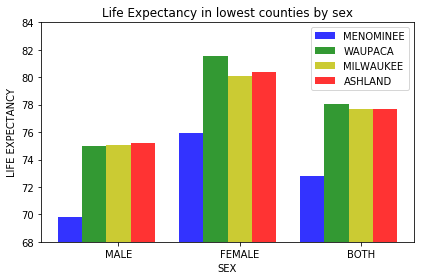

In [165]:
#5) Bar Chart Comparing Menominee, Waupaca, milwaukee, Ashland
# data to plot
n_groups = 3
county1 = healthdfMEN['val']
county2 = healthdfWAU['val']
county3 = healthdfMIL['val']
county4 = healthdfASH['val']
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8
 
rects1 = plt.bar(index -.2, county1, bar_width,
alpha=opacity,
color='b',
label='MENOMINEE')
 
rects2 = plt.bar(index , county2, bar_width,
alpha=opacity,
color='g',
label='WAUPACA')

rects3 = plt.bar(index + .2, county3, bar_width,
alpha=opacity,
color='y',
label='MILWAUKEE')

rects4 = plt.bar(index + .4, county4, bar_width,
alpha=opacity,
color='r',
label='ASHLAND')

# Sets the y limits of the current chart
plt.ylim(68, 84)
 
plt.xlabel('SEX')
plt.ylabel('LIFE EXPECTANCY')
plt.title('Life Expectancy in lowest counties by sex')
plt.xticks(index + bar_width, ('MALE', 'FEMALE', 'BOTH'))
plt.legend()
 
plt.tight_layout()
plt.savefig("Images/GenderLifeExpectancy.png")

50
50


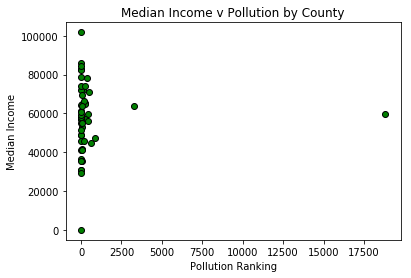

In [166]:
#3) Scatter plot: Median Income vs County names (ordered by the final ranking)

# Create a title, x label, and y label for our chart
plt.title("Median Income v Pollution by County")
plt.ylabel("Median Income")
plt.xlabel("Pollution Ranking")

yincome_axis = incomepivot['Mean']
x_axis = wi_df['Final Ranking'].sample(n=50, random_state=1)

plt.scatter(x_axis, yincome_axis, marker="o", facecolors="green", edgecolors="black")

plt.savefig("Images/IncomePollutionOutlier.png")

print(len(incomepivot['Mean']))
print(len(randsample))

219
50


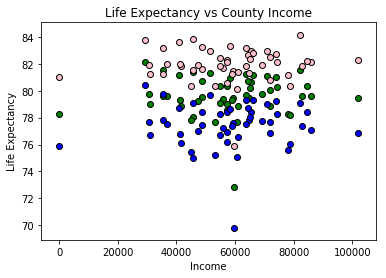

In [167]:
#3) Scatter plot: Life Expectancy vs County names (ordered by income)

# Create a title, x label, and y label for our chart
plt.title("Life Expectancy vs County Income")
plt.ylabel("Life Expectancy")
plt.xlabel("Income")


y_axis4 = healthboth_df['val'].sample(n=50, random_state=1)
y_axis5 = healthma_df['val'].sample(n=50, random_state=1)
y_axis6 = healthfe_df['val'].sample(n=50, random_state=1)
x_axis2 = incomepivot['Mean']

plt.scatter(x_axis2, y_axis4, marker="o", facecolors="green", edgecolors="black")
plt.scatter(x_axis2, y_axis5, marker="o", facecolors="blue", edgecolors="black")
plt.scatter(x_axis2, y_axis6, marker="o", facecolors="pink", edgecolors="black")

plt.savefig("Images/LifevCountyOutlier.png")


print(len(healthdf['val']))
print(len(incomepivot['Mean']))

Graphs after Milwaukee is dropped

In [168]:
wi_df.head()

,County,Value,Weighted Rank,Final Ranking
0,ADAMS,645.65,9.932,1.538295
1,ASHLAND,1045.04,31.988,3.060935
2,BARRON,862.71,702.189,81.393400
3,BAYFIELD,1477.86,0.000,0.000000
4,BROWN,529.71,8785.226,1658.497291


In [169]:
len(wi_df)

73

In [170]:
wi_df.drop(wi_df.index[wi_df['County'] == 'MILWAUKEE'], inplace = True)
len(wi_df)

72

In [171]:
healthdf.head()

,measure_id,measure_name,location_id,location_name,FIPS,sex_id,sex,age_id,age_name,year_id,metric,val,upper,lower
34,26,Life expectancy,572,WISCONSIN,55,1,Male,161,0,2014,Years,77.654684,77.754006,77.559289
69,26,Life expectancy,572,WISCONSIN,55,2,Female,161,0,2014,Years,81.898503,81.982344,81.810366
104,26,Life expectancy,572,WISCONSIN,55,3,Both,161,0,2014,Years,79.791265,79.857729,79.727804
139,26,Life expectancy,3670,ADAMS,55001,1,Male,161,0,2014,Years,75.224196,76.083217,74.364600
174,26,Life expectancy,3670,ADAMS,55001,2,Female,161,0,2014,Years,81.036637,81.817024,80.282969


In [172]:
healthdf.drop(healthdf.index[healthdf['FIPS'] == 55079], inplace = True)
len(healthdf)
#seperate data frames
healthboth_df = healthdf.loc[healthdf['sex'] == 'Both']
healthma_df = healthdf.loc[healthdf['sex'] == 'Male']
healthfe_df = healthdf.loc[healthdf['sex'] == 'Female']
healthfe_df

,measure_id,measure_name,location_id,location_name,FIPS,sex_id,sex,age_id,age_name,year_id,metric,val,upper,lower
69,26,Life expectancy,572,WISCONSIN,55,2,Female,161,0,2014,Years,81.898503,81.982344,81.810366
174,26,Life expectancy,3670,ADAMS,55001,2,Female,161,0,2014,Years,81.036637,81.817024,80.282969
279,26,Life expectancy,3622,ASHLAND,55003,2,Female,161,0,2014,Years,80.386521,81.215060,79.524497
384,26,Life expectancy,3629,BARRON,55005,2,Female,161,0,2014,Years,81.817434,82.401250,81.228511
489,26,Life expectancy,3620,BAYFIELD,55007,2,Female,161,0,2014,Years,81.991371,82.796236,81.171766
594,26,Life expectancy,3667,BROWN,55009,2,Female,161,0,2014,Years,82.474285,82.867707,82.076752
699,26,Life expectancy,3640,BUFFALO,55011,2,Female,161,0,2014,Years,82.480065,83.303624,81.636092
804,26,Life expectancy,3626,BURNETT,55013,2,Female,161,0,2014,Years,81.799585,82.601705,81.028039
909,26,Life expectancy,3673,CALUMET,55015,2,Female,161,0,2014,Years,82.463513,83.085283,81.851287
1014,26,Life expectancy,3632,CHIPPEWA,55017,2,Female,161,0,2014,Years,82.226321,82.761859,81.654167


216
72


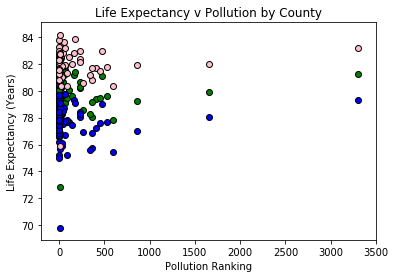

In [173]:
#2) Scatter plot: Life expectancy vs County names (ordered by the final ranking) AFTER dropping Menominee

# Create a title, x label, and y label for our chart
plt.title("Life Expectancy v Pollution by County")
plt.ylabel("Life Expectancy (Years)")
plt.xlabel("Pollution Ranking")


y_axis = healthboth_df['val']
y_axis2 = healthma_df['val']
y_axis3 = healthfe_df['val']
x_axis = wi_df['Final Ranking']

plt.scatter(x_axis, y_axis, marker="o", facecolors="green", edgecolors="black")
plt.scatter(x_axis, y_axis2, marker="o", facecolors="blue", edgecolors="black")
plt.scatter(x_axis, y_axis3, marker="o", facecolors="pink", edgecolors="black")

plt.savefig("Images/LifevPollution.png")


print(len(healthdf['val']))
print(len(wi_df['Final Ranking']))

50
50


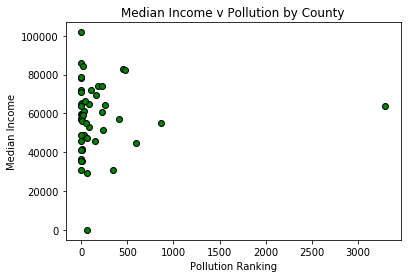

In [174]:
#3) Scatter plot: Median Income vs County names (ordered by the final ranking) AFTER MIL is dropped

# Create a title, x label, and y label for our chart
plt.title("Median Income v Pollution by County")
plt.ylabel("Median Income")
plt.xlabel("Pollution Ranking")

yincome_axis = incomepivot['Mean']
x_axis = wi_df['Final Ranking'].sample(n=50, random_state=1)

plt.scatter(x_axis, yincome_axis, marker="o", facecolors="green", edgecolors="black")

plt.savefig("Images/IncomePollution.png")

print(len(incomepivot['Mean']))
print(len(randsample))

216
50


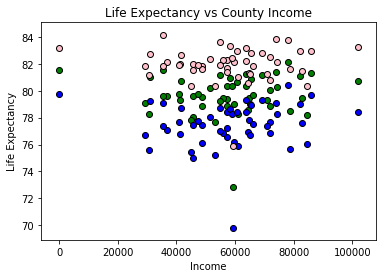

In [175]:
#3) Scatter plot: Life Expectancy vs County names (ordered by income) AFTER MILWAUKEE is dropped

# Create a title, x label, and y label for our chart
plt.title("Life Expectancy vs County Income")
plt.ylabel("Life Expectancy")
plt.xlabel("Income")


y_axis4 = healthboth_df['val'].sample(n=50, random_state=1)
y_axis5 = healthma_df['val'].sample(n=50, random_state=1)
y_axis6 = healthfe_df['val'].sample(n=50, random_state=1)
x_axis2 = incomepivot['Mean']

plt.scatter(x_axis2, y_axis4, marker="o", facecolors="green", edgecolors="black")
plt.scatter(x_axis2, y_axis5, marker="o", facecolors="blue", edgecolors="black")
plt.scatter(x_axis2, y_axis6, marker="o", facecolors="pink", edgecolors="black")

plt.savefig("Images/LifeExpectancyCounty.png")

print(len(healthdf['val']))
print(len(incomepivot['Mean']))